In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_excel("Emaildata_Train.xlsx",header=0)
df2=pd.read_excel("Customerdata_Train.xlsx",header=0)
df3=pd.read_excel("transactionsdata_Train.xlsx",header=0)
df4=pd.read_excel("Train.xlsx",header=0)

In [3]:
df1

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable
...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no


In [4]:
df1.drop(columns=["DateOfemail","timestamp"],axis=1,inplace=True)

In [5]:
print(df1['CustomerID'].nunique())

23820


In [6]:
df1.duplicated().sum()

459843

In [7]:
df1.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
df1["MailClicked"].value_counts() 

no               25373
NotApplicable    23820
yes               8636
Name: MailClicked, dtype: int64

In [9]:
df1=df1.loc[(df1['MailClicked']=='NotApplicable'),]
df1

,CustomerID,EmailType,MailOpened,MailClicked
0,C16368,WelcomeEmail,yes,NotApplicable
1,C20345,WelcomeEmail,yes,NotApplicable
2,C17683,WelcomeEmail,yes,NotApplicable
3,C18647,WelcomeEmail,yes,NotApplicable
4,C36692,WelcomeEmail,yes,NotApplicable
...,...,...,...,...
23815,C23511,WelcomeEmail,yes,NotApplicable
23816,C12197,WelcomeEmail,yes,NotApplicable
23817,C40967,WelcomeEmail,yes,NotApplicable
23818,C36140,WelcomeEmail,yes,NotApplicable


In [10]:
print(df2['CustomerID'].nunique())

23820


In [11]:
df2

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday
23816,C12197,CITY3,2018-01-17,1,0,1,Friday
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday


In [12]:
df2.drop(columns=["DateOfRegistration"],axis=1,inplace=True)

In [13]:
df3

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81
...,...,...,...,...
104750,C12197,2018-01-17,14:35:40,56
104751,C40967,2018-01-17,17:15:20,35
104752,C36140,2018-01-17,13:12:54,47
104753,C36140,2018-01-21,21:12:52,53


In [14]:
df3.CustomerID.nunique()

23820

In [15]:
df3.drop(columns=["DateOfOrder","timestamp"],axis=1,inplace=True)

In [16]:
df3

,CustomerID,OrderQuantity
0,C16368,15
1,C20345,92
2,C20345,95
3,C20345,74
4,C20345,81
...,...,...
104750,C12197,56
104751,C40967,35
104752,C36140,47
104753,C36140,53


In [17]:
df3.duplicated().sum()

30272

In [18]:
df3.drop_duplicates(subset=None, keep='first', inplace=True)

In [19]:
df3.duplicated("CustomerID").sum()

50663

In [20]:
df3 = df3.drop_duplicates(subset=['CustomerID'], keep='first')

In [21]:
df3

,CustomerID,OrderQuantity
0,C16368,15
1,C20345,92
187,C17683,27
200,C18647,110
207,C36692,75
...,...,...
104749,C23511,41
104750,C12197,56
104751,C40967,35
104752,C36140,47


In [22]:
df4

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High
...,...,...
23815,C14975,Low
23816,C30392,Low
23817,C41735,Low
23818,C26055,Low


In [23]:
df4["RetentionPotential"].value_counts(normalize=True) * 100

Low       80.541562
High      15.768262
Medium     3.690176
Name: RetentionPotential, dtype: float64

In [24]:
Df1 = pd.merge(df1, df2, on='CustomerID')

In [25]:
Df1

,CustomerID,EmailType,MailOpened,MailClicked,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,WelcomeEmail,yes,NotApplicable,CITY2,0,0,0,Monday
1,C20345,WelcomeEmail,yes,NotApplicable,CITY2,1,1,1,Friday
2,C17683,WelcomeEmail,yes,NotApplicable,CITY2,0,0,0,Wednesday
3,C18647,WelcomeEmail,yes,NotApplicable,CITY4,0,0,0,Monday
4,C36692,WelcomeEmail,yes,NotApplicable,CITY2,1,1,0,Friday
...,...,...,...,...,...,...,...,...,...
23815,C23511,WelcomeEmail,yes,NotApplicable,CITY2,1,1,0,Friday
23816,C12197,WelcomeEmail,yes,NotApplicable,CITY3,1,0,1,Friday
23817,C40967,WelcomeEmail,yes,NotApplicable,CITY3,1,0,0,Saturday
23818,C36140,WelcomeEmail,yes,NotApplicable,CITY3,1,1,0,Saturday


In [26]:
Df2=pd.merge(df3, df4, on='CustomerID')

In [27]:
Df2

,CustomerID,OrderQuantity,RetentionPotential
0,C16368,15,High
1,C20345,92,Low
2,C17683,27,Medium
3,C18647,110,Low
4,C36692,75,Low
...,...,...,...
23815,C23511,41,Low
23816,C12197,56,Low
23817,C40967,35,Low
23818,C36140,47,Low


In [28]:
data=pd.merge(Df1, Df2, on='CustomerID')

In [29]:
data

,CustomerID,EmailType,MailOpened,MailClicked,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,C16368,WelcomeEmail,yes,NotApplicable,CITY2,0,0,0,Monday,15,High
1,C20345,WelcomeEmail,yes,NotApplicable,CITY2,1,1,1,Friday,92,Low
2,C17683,WelcomeEmail,yes,NotApplicable,CITY2,0,0,0,Wednesday,27,Medium
3,C18647,WelcomeEmail,yes,NotApplicable,CITY4,0,0,0,Monday,110,Low
4,C36692,WelcomeEmail,yes,NotApplicable,CITY2,1,1,0,Friday,75,Low
...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,WelcomeEmail,yes,NotApplicable,CITY2,1,1,0,Friday,41,Low
23816,C12197,WelcomeEmail,yes,NotApplicable,CITY3,1,0,1,Friday,56,Low
23817,C40967,WelcomeEmail,yes,NotApplicable,CITY3,1,0,0,Saturday,35,Low
23818,C36140,WelcomeEmail,yes,NotApplicable,CITY3,1,1,0,Saturday,47,Low


In [30]:
data.isnull().sum()

CustomerID              0
EmailType               0
MailOpened              0
MailClicked             0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
RetentionPotential      0
dtype: int64

In [31]:
data.duplicated().sum()

0

In [32]:
data.dtypes

CustomerID              object
EmailType               object
MailOpened              object
MailClicked             object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
OrderQuantity            int64
RetentionPotential      object
dtype: object

In [33]:
data.drop(columns=["CustomerID"],axis=1,inplace=True)

In [34]:
data.dtypes

EmailType               object
MailOpened              object
MailClicked             object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
OrderQuantity            int64
RetentionPotential      object
dtype: object

In [35]:
data.OrderQuantity.unique()

array([  15,   92,   27,  110,   75,   73,   95,  109,  127,  112,   55,
         57,   94,   22,   30,   82,  113,   78,   68,   31,   77,   61,
        114,   16,  108,  171,   44,   29,   37,   32,   23,  117,   33,
         54,  102,  175,   58,   56,   40,   45,   25,   41,   70,   51,
         64,   24,  166,   74,   81,  165,   53,   34,   19,   28,  107,
        153,   36,  115,   38,  140,   50,   43,   17,  303,   67,   80,
         62,  122,   76,   85,   21,   35,   48,  182,   96,   20,  157,
         91,   60,  130,   59,   63,   49,   42,  139,   87,  149,  202,
         26,  201,   93,  136,  273,  147,  203,  125,   12,   39,  154,
        151,  135,   98,   52,   72,  123,    5,  119,   65,  106,  126,
        230,  184,  116,   66,   84,  104,   11,  103,   97,   79,  138,
        101,  144,  141,  221,   69,   46,   90,  161,  100,  133,   86,
         14,   47,  121,    3,    6,  214,  146,   71,  132,  164,   99,
          8,  134,  158,  160,  225,   89,  234,  2

C:\Users\Madunala Jayanth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OrderQuantity', ylabel='Density'>

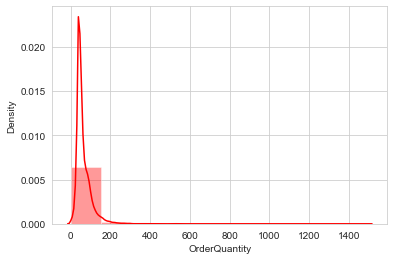

In [36]:
sns.set_style('whitegrid')
sns.distplot(data['OrderQuantity'], color ='red',bins=10)

In [37]:
data['OrderQuantity']=pd.cut(data['OrderQuantity'], [0,100,1400] ,labels=["1","2"] , right=True)

C:\Users\Madunala Jayanth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DoorstepDelivery', ylabel='Density'>

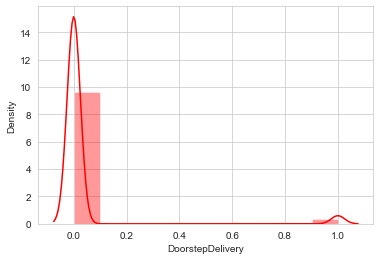

In [38]:
sns.set_style('whitegrid')
sns.distplot(data["DoorstepDelivery"], color ='red',bins=10)

In [39]:
data.dtypes

EmailType                 object
MailOpened                object
MailClicked               object
City                      object
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay      object
OrderQuantity           category
RetentionPotential        object
dtype: object

In [40]:
data.columns

Index(['EmailType', 'MailOpened', 'MailClicked', 'City', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'OrderQuantity', 'RetentionPotential'],
      dtype='object')

In [41]:
for col in [ 'EmailType', 'MailOpened', 'MailClicked', 'City', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'OrderQuantity', 'RetentionPotential']:
    data[col] = data[col].astype('object')

In [42]:
data['EmailType'].mask(data['EmailType'] == "CustomizedEmail", 1, inplace=True)
data['EmailType'].mask(data['EmailType'] ==  "WelcomeEmail", 2, inplace=True)

In [43]:
data['MailOpened'].mask(data['MailOpened'] == "no", 1, inplace=True)
data['MailOpened'].mask(data['MailOpened'] ==  "yes", 2, inplace=True)

In [44]:
data['MailClicked'].mask(data['MailClicked'] == "no", 1, inplace=True)
data['MailClicked'].mask(data['MailClicked'] ==  "yes", 2, inplace=True)
data['MailClicked'].mask(data['MailClicked'] == "NotApplicable", 3, inplace=True)

In [45]:
data['City'].mask(data['City'] == "CITY2", 1, inplace=True)
data['City'].mask(data['City'] ==  "CITY4", 2, inplace=True)
data['City'].mask(data['City'] == "CITY3", 3, inplace=True)
data['City'].mask(data['City'] ==  "CITY1", 4, inplace=True)

In [46]:
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] == "Monday", 1, inplace=True)
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] ==  "Tuesday", 2, inplace=True)
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] == "Friday", 3, inplace=True)
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] ==  "Thursday", 4, inplace=True)
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] == "Wednesday", 5, inplace=True)
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] ==  "Saturday", 6, inplace=True)
data['PreferredDeliveryDay'].mask(data['PreferredDeliveryDay'] == "Sunday", 7, inplace=True)

In [47]:
data["RetentionPotential"].value_counts(normalize=True) * 100

Low       80.541562
High      15.768262
Medium     3.690176
Name: RetentionPotential, dtype: float64

In [48]:
data['RetentionPotential'].mask(data['RetentionPotential'] == "Low", 1, inplace=True)
data['RetentionPotential'].mask(data['RetentionPotential'] ==  "Medium", 2, inplace=True)
data['RetentionPotential'].mask(data['RetentionPotential'] == "High", 3, inplace=True)

In [49]:
data.isnull().sum()

EmailType               0
MailOpened              0
MailClicked             0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           2
RetentionPotential      0
dtype: int64

In [50]:
data["OrderQuantity"] = data["OrderQuantity"].fillna(data["OrderQuantity"].mode()[0])

In [51]:
for col in [ 'EmailType', 'MailOpened', 'MailClicked', 'City', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'OrderQuantity', 'RetentionPotential']:
    data[col] = data[col].astype('int')

In [52]:
data

,EmailType,MailOpened,MailClicked,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,2,2,3,1,0,0,0,1,1,3
1,2,2,3,1,1,1,1,3,1,1
2,2,2,3,1,0,0,0,5,1,2
3,2,2,3,2,0,0,0,1,2,1
4,2,2,3,1,1,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...
23815,2,2,3,1,1,1,0,3,1,1
23816,2,2,3,3,1,0,1,3,1,1
23817,2,2,3,3,1,0,0,6,1,1
23818,2,2,3,3,1,1,0,6,1,1


In [53]:
X = data.drop('RetentionPotential', axis=1)
y = data['RetentionPotential']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=321)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from scipy.stats import chi2_contingency
import pandas as pd

class CHAIDDecisionTree:
    def __init__(self, alpha=0.05, min_samples_split=5, max_depth=None):
        self.alpha = alpha
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.target_variable = y.name
        data = pd.concat([X, y], axis=1)
        self.tree = self._build_tree(data, depth=1)
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            return X.apply(self._traverse_tree, axis=1)
        elif isinstance(X, list):
            df = pd.DataFrame(X).T
            return df.apply(self._traverse_tree, axis=1).iloc[0]
        else:
            raise TypeError("Input must be a pandas DataFrame or a list.")
    
    def _build_tree(self, data, depth):
        if data[self.target_variable].nunique() == 1 or \
           (self.max_depth is not None and depth > self.max_depth) or \
           len(data) < self.min_samples_split:
            return data[self.target_variable].mode().iloc[0]
        
        best_variable = None
        best_p = 1
        for variable in data.columns:
            if variable == self.target_variable:
                continue
            table = pd.crosstab(data[variable], data[self.target_variable])
            chi2, p, dof, expected = chi2_contingency(table)
            if p < best_p:
                best_variable = variable
                best_p = p
        
        if best_p > self.alpha:
            return data[self.target_variable].mode().iloc[0]
        
        tree = {best_variable: {}}
        for group in self._split_data(data, best_variable):
            value = group[best_variable].iloc[0]
            subtree = self._build_tree(group, depth+1)
            tree[best_variable][value] = subtree
        
        return tree
    
    def _split_data(self, data, variable):
        groups = data.groupby(variable)
        return [groups.get_group(x) for x in groups.groups]
    
    def _traverse_tree(self, row):
        node = self.tree
        while isinstance(node, dict):
            variable = list(node.keys())[0]
            value = row[variable]
            node = node[variable][value]
        return node


In [56]:
def accuracy(actual,pridicted):
    accuracy = np.mean(actual == pridicted)
    return accuracy

In [58]:
model2 = CHAIDDecisionTree(alpha=0.4,min_samples_split=2,max_depth=7)
model2.fit(X, y)

In [59]:
train_pred1=model2.predict(X_train)
test_pred1=model2.predict(X_test)

In [60]:
accuracy(y_train,train_pred1)

0.8056854983807125

In [61]:
accuracy(y_test,test_pred1)

0.8057654631961937

In [62]:
model3 = CHAIDDecisionTree(alpha=0.7,min_samples_split=2,max_depth=10)
model3.fit(X, y)

In [63]:
train_pred2=model3.predict(X_train)
test_pred2=model3.predict(X_test)

In [64]:
accuracy(y_train,train_pred2)

0.8056854983807125

In [65]:
accuracy(y_test,test_pred2)

0.8057654631961937